In [1]:
using Gen


In [6]:
#Coment the cells
#Plots
#Ecuatiile in pdf pt arhiva
#Side by side pt regresie vs standard NN
#Tabel cu rezultate


LoadError: syntax: extra token "plot" after end of expression

In [212]:
@gen function line_model(xs)   
    w1 = ({:w1} ~ normal(1, 2))
    
    w2 = ({:w2} ~ normal(1, 2))
    
    w3 = ({:w3} ~ normal(1, 2))
    
    w4 = ({:w4} ~ normal(1, 2))
        
    w5 = ({:w5} ~ normal(1, 2))
    
    w6 = ({:w6} ~ normal(1, 2))
    
    bias = ({:bias} ~ normal(0, 2))
    
    # We define a function to compute rd for given inputs
    function rd(x)
        return w1 .* x[1] + w2 .* x[2] + w3 .* x[3] + w4 .* x[4] + w5 .* x[5] + w6 .* x[6] + bias
    end

    # Given the weights and bias, we can sample RD
    # for each of the x coordinates in our input vector.
    for (i, x) in enumerate(xs)
        ({(:rd, i)} ~ normal(rd(x), 0.1))
    end

    
    return rd
end;

In [109]:
@gen function line_model_multiple_layers(xs, sizes)
    
    weights = []
    biases = []
    a = []
    for (i, size) in enumerate(sizes)
        weights_layer = []
        biases_layer = []
        a_layer = []
        for j in 1:size
            weights_layer_neuron = []
            bias_layer_neuron = ({(i, j)} ~ normal(0, 2))
            #if it's the first layer, the input layer has 6 values
            if i == 1
                for q in 1:6
                    weight = ({(i, (j, q))} ~ normal(0, 1))
                    push!(weights_layer_neuron, weight)
                end
            else
                for q in 1:sizes[i - 1]
                    weight = ({(i, (j, q))} ~ normal(0, 1))
                    push!(weights_layer_neuron, weight)
                end
            end
            push!(a_layer, 0)
            push!(biases_layer, bias_layer_neuron)
            push!(weights_layer, weights_layer_neuron)
        end
        push!(a, a_layer)
        push!(weights, weights_layer)
        push!(biases, biases_layer)
    end
    # We define a function to compute y for a given x
    function rd(x)
        for (i, size) in enumerate(sizes)
            for j in 1:size

                a_neuron = 0
                if i == 1
                    q = 1
                    for w in weights[i][j]
                        a_neuron += w .* x[q]
                        q += 1
                    end
                else
                    q = 1
                    for w in weights[i][j]
                        a_neuron += w .* a[j][q]
                        q += 1
                    end
                end

                a_neuron += biases[i][j]
                a[i][j] = a_neuron
                
            end
        end
        return a[sizes[length(sizes)]][1]
    end

    
    for (i, x) in enumerate(xs)
       
        ({(:rd, i)} ~ normal(rd(x), 0.1))
    end

    return rd
end;

In [241]:
@gen function line_model(xs)
    
    w111 = ({:w111} ~ normal(0, 1))
    
    w121 = ({:w121} ~ normal(0, 1))
    
    w131 = ({:w131} ~ normal(0, 1))
    
    w141 = ({:w141} ~ normal(0, 1))
        
    w151 = ({:w151} ~ normal(0, 1))
    
    w161 = ({:w161} ~ normal(0, 1))
    
    bias11 = ({:bias11} ~ normal(0, 2))
    
    w211 = ({:w211} ~ normal(0, 1))
    
    w221 = ({:w221} ~ normal(0, 1))
    
    w231 = ({:w231} ~ normal(0, 1))
    
    w241 = ({:w241} ~ normal(0, 1))
        
    w251 = ({:w251} ~ normal(0, 1))
    
    w261 = ({:w261} ~ normal(0, 1))
    
    bias21 = ({:bias21} ~ normal(0, 2))
    
    w311 = ({:w311} ~ normal(0, 1))
    
    w321 = ({:w321} ~ normal(0, 1))
    
    w331 = ({:w331} ~ normal(0, 1))
    
    w341 = ({:w341} ~ normal(0, 1))
        
    w351 = ({:w351} ~ normal(0, 1))
    
    w361 = ({:w361} ~ normal(0, 1))
    
    bias31 = ({:bias31} ~ normal(0, 2))
    
    w112 = ({:w112} ~ normal(0, 1))
    
    w122 = ({:w122} ~ normal(0, 1))
    
    w132 = ({:w132} ~ normal(0, 1))
    
    bias12 = ({:bias12} ~ normal(0, 2))
    
    function rd(x)
        z1 = w111 .* x[1] + w121 .* x[2] + w131 .* x[3] + w141 .* x[4] + w151 .* x[5] + w161 .* x[6] + bias11
        z2 = w211 .* x[1] + w221 .* x[2] + w231 .* x[3] + w241 .* x[4] + w251 .* x[5] + w261 .* x[6] + bias21
        z3 = w311 .* x[1] + w321 .* x[2] + w331 .* x[3] + w341 .* x[4] + w351 .* x[5] + w361 .* x[6] + bias31
        
        return w112 .* z1 + w122 .* z2 + w132 .* z3 + bias12
    end

    for (i, x) in enumerate(xs)
        ({(:rd, i)} ~ normal(rd(x), 0.1))
    end

    return rd
end;

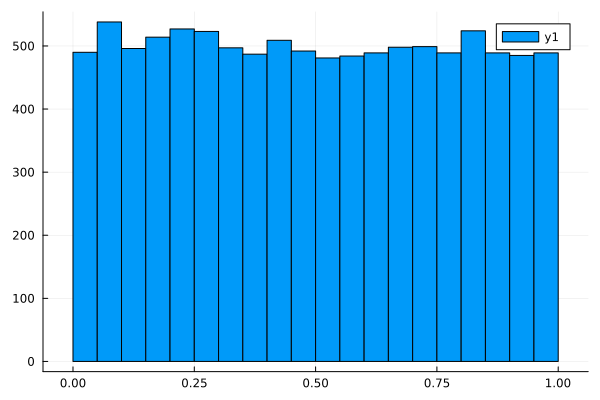

In [38]:
Plots.histogram([uniform(0, 1) for i in 1:10000])

In [3]:
using CSV

In [4]:
train_data = Vector{Vector{Float64}}()
train_answers = Vector{Float64}()
csv_reader = CSV.File("train_data.csv")
for row in csv_reader
    push!(train_data, [row.old_rating, row.old_RD, row.new_rating, row.new_RD, row.enemy_rating, row.score])
end

csv_reader = CSV.File("train_answers.csv")
for row in csv_reader
    push!(train_answers, row.enemy_RD)
end

print(train_data)
print(train_answers)

[[1500.0, 350.0, 1461.246505968767, 317.0089502789465, 1994.200429514773, 0.0], [1461.246505968767, 317.0089502789465, 1602.2131303121218, 252.41070178189142, 1427.6189374648475, 1.0], [1602.2131303121218, 252.41070178189142, 1550.6627798759382, 211.84847511633265, 1448.4633538067847, 0.5], [1550.6627798759382, 211.84847511633265, 1725.7911957134365, 197.8879943779665, 1895.8752717008208, 1.0], [1725.7911957134365, 197.8879943779665, 1799.4953276141198, 176.0201175690079, 1690.470444481267, 1.0], [1799.4953276141198, 176.0201175690079, 1766.9901195636446, 167.12246082324185, 2029.8728565000933, 0.0], [1766.9901195636446, 167.12246082324185, 1645.2480948571865, 162.60283522415236, 1316.4671361130208, 0.0], [1645.2480948571865, 162.60283522415236, 1602.775916125635, 152.63484491361208, 1742.6458975836838, 0.0], [1602.775916125635, 152.63484491361208, 1620.787018144196, 146.1356091172358, 1295.7688276121507, 1.0], [1620.787018144196, 146.1356091172358, 1641.899540866759, 139.5988434817079

1536.6945046922692, 69.49537309976955, 1528.2703342607301, 69.39486678544382, 1647.7529828279078, 0.0], [1528.2703342607301, 69.39486678544382, 1545.9358427084198, 69.04858736327391, 1659.413466605883, 1.0], [1545.9358427084198, 69.04858736327391, 1541.7293048193544, 69.20280316188746, 1853.2670800824228, 0.0], [1541.7293048193544, 69.20280316188746, 1542.235170253225, 68.88668809790413, 1557.978958400778, 0.5], [1542.235170253225, 68.88668809790413, 1549.890907041331, 68.7454906173932, 1393.2225102150264, 1.0], [1549.890907041331, 68.7454906173932, 1544.6925942967423, 68.84351972163293, 1803.616005532502, 0.0], [1544.6925942967423, 68.84351972163293, 1559.4232856294423, 68.59976302635617, 1633.117624755453, 1.0], [1559.4232856294423, 68.59976302635617, 1549.9245343458513, 68.23527774847473, 1655.6868129830004, 0.0], [1549.9245343458513, 68.23527774847473, 1568.9199173820255, 68.08304204195808, 1740.4350771206175, 1.0], [1568.9199173820255, 68.08304204195808, 1578.3854563103225, 67.786

[1507.6440958875328, 67.07319418859166, 1513.1270703874236, 67.09404192792378, 1279.1890694134656, 1.0], [1513.1270703874236, 67.09404192792378, 1505.8960181069983, 67.04678379250657, 1663.935520383402, 0.0], [1505.8960181069983, 67.04678379250657, 1515.3285273338258, 66.82357498139275, 1428.1633058066645, 1.0], [1515.3285273338258, 66.82357498139275, 1505.0969357534516, 66.58785283065028, 1564.4156910426973, 0.0], [1505.0969357534516, 66.58785283065028, 1502.676819368973, 67.04338183852921, 1932.6920909818832, 0.0], [1502.676819368973, 67.04338183852921, 1511.890579700283, 66.79711374677198, 1413.7755929085074, 1.0], [1511.890579700283, 66.79711374677198, 1487.438052652394, 67.3381812186947, 1019.1643748457166, 0.0], [1487.438052652394, 67.3381812186947, 1467.4560426900687, 67.25743341687269, 1271.4417848926773, 0.0], [1467.4560426900687, 67.25743341687269, 1461.5178892561844, 67.28329905340551, 1675.785393531861, 0.0], [1461.5178892561844, 67.28329905340551, 1458.3702656295368, 67.68

1480.2887706446786, 69.44118534801495, 1486.5616884542528, 69.27017040996382, 1268.026848604445, 1.0], [1486.5616884542528, 69.27017040996382, 1476.7692839776416, 68.78428856402711, 1585.9577545746245, 0.0], [1476.7692839776416, 68.78428856402711, 1475.1928712398142, 69.32438913557935, 2021.6764184537776, 0.0], [1475.1928712398142, 69.32438913557935, 1495.0225009218607, 69.53765188560395, 1805.1725453035526, 1.0], [1495.0225009218607, 69.53765188560395, 1481.5489178818448, 69.26518803921297, 1446.1332202129784, 0.0], [1481.5489178818448, 69.26518803921297, 1475.0170170878396, 69.11275392320273, 1681.9475767497254, 0.0], [1475.0170170878396, 69.11275392320273, 1485.828732105763, 68.69454240221492, 1416.6000201710713, 1.0], [1485.828732105763, 68.69454240221492, 1477.5099332960147, 68.58129959204604, 1600.7607694717117, 0.0], [1477.5099332960147, 68.58129959204604, 1497.7883546940923, 68.86491027030067, 1836.253414673337, 1.0], [1497.7883546940923, 68.86491027030067, 1494.5934089970851, 

[1569.0690931077147, 66.59304371189741, 1586.8591841897428, 66.88504200457766, 1885.0776770348766, 1.0], [1586.8591841897428, 66.88504200457766, 1585.2433701149434, 66.89051815191607, 1519.3559103718783, 0.5], [1585.2433701149434, 66.89051815191607, 1566.8187956373017, 66.71333983002653, 1415.0036807345953, 0.0], [1566.8187956373017, 66.71333983002653, 1567.7106835981085, 67.36321664672484, 966.6064511000297, 1.0], [1567.7106835981085, 67.36321664672484, 1559.3057424915057, 67.25780908210379, 1672.9175005520797, 0.0], [1559.3057424915057, 67.25780908210379, 1538.8809869733188, 67.21623033165272, 1328.821184057907, 0.0], [1538.8809869733188, 67.21623033165272, 1533.7798131982706, 67.37246495379962, 1785.957287212801, 0.0], [1533.7798131982706, 67.37246495379962, 1532.539786950716, 67.22453998585509, 1489.3113215434885, 0.5], [1532.539786950716, 67.22453998585509, 1539.2362059095378, 67.17538121756131, 1355.9611227155353, 1.0], [1539.2362059095378, 67.17538121756131, 1522.9815412590647, 

, 67.36998014410548, 1621.9780136590116, 0.0], [1570.0786928678378, 67.36998014410548, 1565.3297183569618, 67.59464637343645, 1837.7185430852471, 0.0], [1565.3297183569618, 67.59464637343645, 1564.5311387354407, 67.26746030438407, 1540.947310111503, 0.5], [1564.5311387354407, 67.26746030438407, 1561.6314356031526, 67.66470624782959, 1959.241394975272, 0.0], [1561.6314356031526, 67.66470624782959, 1558.1416237621277, 67.45189669791755, 1449.334655355614, 0.5], [1558.1416237621277, 67.45189669791755, 1554.2286225633015, 67.65178662328618, 1868.6300000296912, 0.0], [1554.2286225633015, 67.65178662328618, 1545.0464812959597, 67.44904396589548, 1640.885047084101, 0.0], [1545.0464812959597, 67.44904396589548, 1559.2380838093575, 67.23090893409714, 1623.0914455105092, 1.0], [1559.2380838093575, 67.23090893409714, 1554.1569568304049, 67.3454807091562, 1807.7738108939916, 0.0], [1554.1569568304049, 67.3454807091562, 1558.7703211952905, 67.48557427055779, 1281.2656561620172, 1.0], [1558.77032119

[1523.8939433755645, 68.07893164388658, 1540.9836526541449, 67.82330436225917, 1659.2250739630517, 1.0], [1540.9836526541449, 67.82330436225917, 1537.5308380853512, 68.14290002758666, 1895.4772769457825, 0.0], [1537.5308380853512, 68.14290002758666, 1544.3700967892755, 68.01696083825932, 1357.5949605944459, 1.0], [1544.3700967892755, 68.01696083825932, 1535.5039139602366, 67.81188034180366, 1645.2601854801012, 0.0], [1535.5039139602366, 67.81188034180366, 1552.2196955615505, 67.97242648398822, 1786.9541160696322, 1.0], [1552.2196955615505, 67.97242648398822, 1545.0564555421265, 67.88802233633831, 1713.9340794666334, 0.0], [1545.0564555421265, 67.88802233633831, 1533.3057497623754, 67.51742663718599, 1564.4774792184724, 0.0], [1533.3057497623754, 67.51742663718599, 1525.9990574001188, 67.48406567879596, 1680.9097680102118, 0.0], [1525.9990574001188, 67.48406567879596, 1525.0958883211406, 67.23284684318327, 1496.5589286584172, 0.5], [1525.0958883211406, 67.23284684318327, 1518.9857215062

1560.3456026749654, 66.75633600058806, 1558.4386490739244, 66.557151975863, 1497.1184246628814, 0.5], [1558.4386490739244, 66.557151975863, 1570.5236865466466, 66.32840639164063, 1573.643013874401, 1.0], [1570.5236865466466, 66.32840639164063, 1567.9445210498411, 66.71599410340609, 1959.849350174096, 0.0], [1567.9445210498411, 66.71599410340609, 1565.2145897120333, 67.16352579281462, 1981.0111584059985, 0.0], [1565.2145897120333, 67.16352579281462, 1569.9359016894566, 67.26359113312148, 1300.6254236093228, 1.0], [1569.9359016894566, 67.26359113312148, 1573.0983203745263, 67.57868037193339, 1209.897709283868, 1.0], [1573.0983203745263, 67.57868037193339, 1579.6271389909393, 67.45350669945864, 1383.291305741383, 1.0], [1579.6271389909393, 67.45350669945864, 1571.817086220347, 67.23232490589056, 1722.3069844219044, 0.0], [1571.817086220347, 67.23232490589056, 1579.8701873961163, 67.13797597945415, 1452.8477802720208, 1.0], [1579.8701873961163, 67.13797597945415, 1572.7349230241743, 67.118

, 66.53610993041832, 1536.7947939246342, 0.5], [1533.3426550556221, 66.53610993041832, 1529.8234574394114, 66.8315561916597, 1866.1246787189457, 0.0], [1529.8234574394114, 66.8315561916597, 1527.4394070915152, 67.27540517095079, 1956.4343298974438, 0.0], [1527.4394070915152, 67.27540517095079, 1519.2159926306556, 67.22832730502677, 1631.9857372988704, 0.0], [1519.2159926306556, 67.22832730502677, 1509.691633961274, 66.95958858063909, 1599.7073265756578, 0.0], [1509.691633961274, 66.95958858063909, 1501.2693914137271, 66.76445709268415, 1623.5512198342735, 0.0], [1501.2693914137271, 66.76445709268415, 1502.4488804256764, 66.77045176741271, 1550.7757682754793, 0.5], [1502.4488804256764, 66.77045176741271, 1495.746119561968, 66.90594630703183, 1655.2303881907187, 0.0], [1495.746119561968, 66.90594630703183, 1496.9803096020084, 66.68516878478498, 1536.4044747442501, 0.5], [1496.9803096020084, 66.68516878478498, 1487.4478489470214, 66.50024261082163, 1564.6003606305599, 0.0], [1487.44784894

1531.2882222631722, 67.75211566773214, 1785.8486315429793, 0.0], [1531.2882222631722, 67.75211566773214, 1537.126720482407, 67.68814609207725, 1313.1731588516177, 1.0], [1537.126720482407, 67.68814609207725, 1520.0134663915044, 67.5320259615204, 1380.2718180448528, 0.0], [1520.0134663915044, 67.5320259615204, 1511.2116913818443, 67.34573445132197, 1619.5459564618186, 0.0], [1511.2116913818443, 67.34573445132197, 1505.9305807326564, 67.47229341472483, 1750.077588191109, 0.0], [1505.9305807326564, 67.47229341472483, 1504.2255130343867, 68.03642586960176, 2048.4757287894354, 0.0], [1504.2255130343867, 68.03642586960176, 1523.3123087534477, 68.18032963494746, 1784.721906437672, 1.0], [1523.3123087534477, 68.18032963494746, 1520.9572464572475, 68.5716781370239, 1944.7802595434148, 0.0], [1520.9572464572475, 68.5716781370239, 1541.5927533815786, 68.59387425290464, 1780.9099266597618, 1.0], [1541.5927533815786, 68.59387425290464, 1545.069427976489, 68.78562907667171, 1205.2746669971843, 1.0],

0.0], [1529.2334609735067, 65.99579242313825, 1535.1966217413062, 66.00686646968259, 1329.2311481295114, 1.0], [1535.1966217413062, 66.00686646968259, 1529.9984282283615, 66.1208686022253, 1769.090335130159, 0.0], [1529.9984282283615, 66.1208686022253, 1519.184688135765, 65.82002347070613, 1566.7351610561568, 0.0], [1519.184688135765, 65.82002347070613, 1519.7469618115063, 65.65652517759571, 1538.3403550821533, 0.5], [1519.7469618115063, 65.65652517759571, 1537.5186307260828, 65.93999174943683, 1820.8297676017455, 1.0], [1537.5186307260828, 65.93999174943683, 1529.0643485852409, 65.75987763282495, 1644.6957644228055, 0.0], [1529.0643485852409, 65.75987763282495, 1511.2585247953302, 65.66081316985004, 1355.2674182993362, 0.0], [1511.2585247953302, 65.66081316985004, 1510.8922931686805, 65.5775831075338, 1497.7301761957672, 0.5], [1510.8922931686805, 65.5775831075338, 1501.6766271042234, 65.33482926949061, 1594.6820081199037, 0.0], [1501.6766271042234, 65.33482926949061, 1514.76767987510

[173.91825162808686, 206.59171040628277, 66.39775080607397, 147.74036866025403, 143.05926856808625, 281.5719513590588, 168.9895403980307, 221.94125739815902, 41.49822200433361, 108.13636550753144, 179.42578661626513, 99.60334261398214, 96.19580375614134, 183.3979436588286, 210.2276234165604, 116.8656702889588, 92.81875467612268, 72.11373971262377, 145.0787497633764, 187.99289382565001, 200.43146661672273, 143.7467303693868, 112.34733130829204, 89.92448987380797, 77.16444683479165, 171.4234139476556, 121.74955702264499, 174.61528658563728, 113.3204466543494, 162.2816074861184, 168.48132557641085, 169.73145571014413, 53.46800394791177, 75.94923813949424, 134.13967114683584, 103.71129974674054, 109.7102468125081, 206.4905319549317, 37.24655339441418, 155.55844336198845, 156.60156827294017, 130.34326468142632, 176.49558533086451, 128.92495813576147, 178.27766056056174, 119.2999767453632, 91.3356045022228, 42.44818990272394, 108.40259045943478, 133.5349884652556, 79.86555950943315, 74.04550

167.82059492852056, 159.59491101358878, 174.5859332566241, 146.02834991290683, 119.53039393184554, 148.88121363845076, 296.46998750062255, 242.1615068950182, 126.83318627110455, 77.13665298988145, 182.47170838969356, 143.97009122220848, 82.35140480090266, 138.35562394550286, 63.36508523620384, 138.84799554634412, 159.39891931971212, 219.60344938225523, 150.38860845966957, 238.7670261615034, 119.09763411639406, 218.5906347025726, 133.02042397576514, 127.9637448528263, 152.69671564754398, 145.2695156597647, 167.32695528832932, 149.28607691574462, 140.01600052776843, 170.24341586111558, 93.66935490103857, 205.33894047839257, 202.54396155058868, 180.36068405548355, 124.05214287619518, 219.98033278719384, 151.23448878087086, 174.00061074825115, 168.7908630890848, 235.20619009250245, 98.64971023886993, 221.84332808532582, 263.4759448658048, 129.34463115561675, 217.95006458233868, 193.48592453435555, 129.05715164882668, 203.95840337637955, 154.72854184303347, 183.95456932894126, 191.101088132

 197.45369674662132, 185.27207983016012, 221.53042529480737, 197.94937735564974, 116.05228418275152, 185.72560749766512, 169.38687602648494, 149.02959778286439, 215.22495173365382, 33.834081844136435, 260.133532324007, 130.8866996104829, 115.71625467389187, 117.39107652097226, 109.64560148878986, 159.96495469638404, 184.3434163906062, 151.22562019234826, 123.88212217679096, 38.82074434315162, 190.98339739484223, 149.6894378888415, 284.56505738916655, 119.55171800048215, 143.0919769843176, 229.03612198857775, 109.93484678318553, 137.9879789567116, 20.515534024872323, 151.51405658418827, 100.59660475861662, 111.33905835221726, 75.01117798276064, 343.7383469855938, 273.9144414742389, 127.63978766037638, 244.16081462007963, 218.67814383793853, 162.7444381230278]

In [213]:
data = train_data[1:800]
enemy_RDs = train_answers[1:800]
validation_data = train_data[801:1000]
validation_answers = train_answers[801:1000]

200-element Vector{Float64}:
 254.9260350526688
  38.78848267357107
 141.63172827520972
 233.04728518982944
 182.7005335792887
 248.28330812375884
 185.48658327109945
 242.57401559673212
 204.65244086424445
  88.01553070647664
 233.449831492627
 143.66553314810938
 166.56629919742585
   ⋮
 137.9879789567116
  20.515534024872323
 151.51405658418827
 100.59660475861662
 111.33905835221726
  75.01117798276064
 343.7383469855938
 273.9144414742389
 127.63978766037638
 244.16081462007963
 218.67814383793853
 162.7444381230278

In [214]:
print(data[1:3])

[[1500.0, 350.0, 1461.246505968767, 317.0089502789465, 1994.200429514773, 0.0], [1461.246505968767, 317.0089502789465, 1602.2131303121218, 252.41070178189142, 1427.6189374648475, 1.0], [1602.2131303121218, 252.41070178189142, 1550.6627798759382, 211.84847511633265, 1448.4633538067847, 0.5]]

In [242]:
rds = line_model(data, )

(::var"#rd#31"{Float64, Float64, Float64, Float64, Float64, Float64, Float64, Float64, Float64, Float64, Float64, Float64, Float64, Float64, Float64, Float64, Float64, Float64, Float64, Float64, Float64, Float64, Float64, Float64, Float64}) (generic function with 1 method)

In [243]:
trace = Gen.simulate(line_model, (data,));

In [244]:
println(trace)

Gen.DynamicDSLTrace{DynamicDSLFunction{Any}}(DynamicDSLFunction{Any}(Dict{Symbol, Any}(), Dict{Symbol, Any}(), Type[Any], false, Union{Nothing, Some{Any}}[nothing], var"##line_model#371", Bool[0], false), Trie{Any, Gen.ChoiceOrCallRecord}(Dict{Any, Gen.ChoiceOrCallRecord}((:rd, 21) => Gen.ChoiceOrCallRecord{Float64}(-1485.972792090185, 1.3398594495864735, NaN, true), (:rd, 15) => Gen.ChoiceOrCallRecord{Float64}(-1576.794332208577, 1.180003318785194, NaN, true), (:rd, 504) => Gen.ChoiceOrCallRecord{Float64}(-1135.7011610880036, 0.9896137788023243, NaN, true), (:rd, 383) => Gen.ChoiceOrCallRecord{Float64}(-1257.0502640465381, 0.9876841031355958, NaN, true), (:rd, 756) => Gen.ChoiceOrCallRecord{Float64}(-1137.23710050498, 0.8937118733767182, NaN, true), (:rd, 195) => Gen.ChoiceOrCallRecord{Float64}(-1070.8939892849119, 0.6237803967614346, NaN, true), (:rd, 648) => Gen.ChoiceOrCallRecord{Float64}(-1181.914281609478, 1.0389262511771264, NaN, true), (:rd, 266) => Gen.ChoiceOrCallRecord{Float

-1206.9745672309577, 1.3249148821485357, NaN, true), (:rd, 530) => Gen.ChoiceOrCallRecord{Float64}(-1494.3557839300083, 1.3484913153524425, NaN, true), (:rd, 145) => Gen.ChoiceOrCallRecord{Float64}(-1226.6354149389704, 1.3647875147092194, NaN, true), (:rd, 355) => Gen.ChoiceOrCallRecord{Float64}(-1392.2259349134206, 1.3080160978814686, NaN, true), (:rd, 542) => Gen.ChoiceOrCallRecord{Float64}(-1294.2614428511285, 0.8273360714560412, NaN, true), (:rd, 566) => Gen.ChoiceOrCallRecord{Float64}(-1221.548623142118, 1.129257583640861, NaN, true), :w311 => Gen.ChoiceOrCallRecord{Float64}(0.014864660913498284, -0.9190490122767093, NaN, true), (:rd, 654) => Gen.ChoiceOrCallRecord{Float64}(-1250.1754515049695, 1.3829750846443034, NaN, true), (:rd, 378) => Gen.ChoiceOrCallRecord{Float64}(-1192.329331897674, 1.1514546013803355, NaN, true), (:rd, 284) => Gen.ChoiceOrCallRecord{Float64}(-1180.6235370321529, -0.3942573830668854, NaN, true), :w151 => Gen.ChoiceOrCallRecord{Float64}(-0.05057116421737765

, NaN, true), (:rd, 167) => Gen.ChoiceOrCallRecord{Float64}(-1492.3091665038082, 0.6268936416848794, NaN, true), (:rd, 454) => Gen.ChoiceOrCallRecord{Float64}(-1065.7011999350227, 1.3792118132885651, NaN, true), (:rd, 548) => Gen.ChoiceOrCallRecord{Float64}(-1255.6418273197592, 1.158303122915047, NaN, true), (:rd, 279) => Gen.ChoiceOrCallRecord{Float64}(-1166.7408418810326, 1.22880667707954, NaN, true), (:rd, 337) => Gen.ChoiceOrCallRecord{Float64}(-1512.853471671295, 0.9551270134455767, NaN, true), (:rd, 788) => Gen.ChoiceOrCallRecord{Float64}(-1530.5236243459221, 1.2009529858951478, NaN, true), (:rd, 520) => Gen.ChoiceOrCallRecord{Float64}(-1259.833307779854, 1.3178074983214547, NaN, true), (:rd, 370) => Gen.ChoiceOrCallRecord{Float64}(-1279.194390025332, 1.3040231577813572, NaN, true), (:rd, 521) => Gen.ChoiceOrCallRecord{Float64}(-1386.1082405607553, 1.2861146519193438, NaN, true), (:rd, 209) => Gen.ChoiceOrCallRecord{Float64}(-1221.12034270769, 1.3031838909601037, NaN, true), (:rd

30) => Gen.ChoiceOrCallRecord{Float64}(-1156.521585296271, 1.328004360943444, NaN, true), (:rd, 345) => Gen.ChoiceOrCallRecord{Float64}(-1385.3266203894686, 1.0155517888947554, NaN, true), (:rd, 460) => Gen.ChoiceOrCallRecord{Float64}(-1102.1416210702102, 0.5545381315633295, NaN, true), (:rd, 43) => Gen.ChoiceOrCallRecord{Float64}(-1143.6452190204138, 0.340568052242866, NaN, true), (:rd, 81) => Gen.ChoiceOrCallRecord{Float64}(-1172.7443945318912, 0.7975319271816281, NaN, true), (:rd, 85) => Gen.ChoiceOrCallRecord{Float64}(-1326.1380007650646, 1.3821698245514054, NaN, true), (:rd, 254) => Gen.ChoiceOrCallRecord{Float64}(-1344.3890257019966, 1.3799311147371018, NaN, true), (:rd, 553) => Gen.ChoiceOrCallRecord{Float64}(-1292.928209834209, 1.2915170427077813, NaN, true), (:rd, 702) => Gen.ChoiceOrCallRecord{Float64}(-1572.385184841162, 1.254362553521742, NaN, true), (:rd, 314) => Gen.ChoiceOrCallRecord{Float64}(-1316.6451871025993, 1.1551079080715874, NaN, true), (:rd, 527) => Gen.ChoiceOr

:rd, 69) => Gen.ChoiceOrCallRecord{Float64}(-1439.8886199797112, 1.3822787736276532, NaN, true), (:rd, 642) => Gen.ChoiceOrCallRecord{Float64}(-1162.45496080178, 1.3299120966747073, NaN, true), (:rd, 731) => Gen.ChoiceOrCallRecord{Float64}(-1268.7118388049114, 1.2172168920131976, NaN, true), (:rd, 586) => Gen.ChoiceOrCallRecord{Float64}(-1252.2958292231026, 1.3831814543660947, NaN, true), (:rd, 162) => Gen.ChoiceOrCallRecord{Float64}(-1188.629489268173, 0.016451454898759987, NaN, true), (:rd, 267) => Gen.ChoiceOrCallRecord{Float64}(-1137.2875781734479, 0.8564235262216835, NaN, true), (:rd, 304) => Gen.ChoiceOrCallRecord{Float64}(-1094.887776932881, 1.379015546777587, NaN, true), (:rd, 325) => Gen.ChoiceOrCallRecord{Float64}(-1311.4413282376559, 1.3754549198769617, NaN, true), (:rd, 751) => Gen.ChoiceOrCallRecord{Float64}(-1188.0565128349301, 1.2634330522957462, NaN, true), (:rd, 184) => Gen.ChoiceOrCallRecord{Float64}(-1327.2680249089813, 1.1389758610829401, NaN, true), (:rd, 736) => G

, NaN, true), (:rd, 681) => Gen.ChoiceOrCallRecord{Float64}(-1411.0318456059965, 1.363117398675326, NaN, true), (:rd, 522) => Gen.ChoiceOrCallRecord{Float64}(-1246.51439580676, 1.3338252568035673, NaN, true), (:rd, 627) => Gen.ChoiceOrCallRecord{Float64}(-1375.597116092632, 1.1504694839997938, NaN, true), (:rd, 77) => Gen.ChoiceOrCallRecord{Float64}(-1198.014431055008, 1.2495360832114664, NaN, true), (:rd, 240) => Gen.ChoiceOrCallRecord{Float64}(-1315.4572955612334, 1.3655804204038429, NaN, true), (:rd, 470) => Gen.ChoiceOrCallRecord{Float64}(-1305.4973862715576, 1.3641783510655956, NaN, true), (:rd, 574) => Gen.ChoiceOrCallRecord{Float64}(-1280.8882353471543, 0.9972703719348843, NaN, true), (:rd, 74) => Gen.ChoiceOrCallRecord{Float64}(-1198.8428289982269, 1.3116753737700315, NaN, true), (:rd, 418) => Gen.ChoiceOrCallRecord{Float64}(-1347.6190898530022, 0.8607798299027434, NaN, true), (:rd, 494) => Gen.ChoiceOrCallRecord{Float64}(-1264.019756107425, -1.090466621516894, NaN, true), (:rd

), (:rd, 351) => Gen.ChoiceOrCallRecord{Float64}(-1443.1246553879737, 0.955764740149871, NaN, true), (:rd, 607) => Gen.ChoiceOrCallRecord{Float64}(-1264.5022595791454, 1.1341338001949512, NaN, true), (:rd, 777) => Gen.ChoiceOrCallRecord{Float64}(-1123.3699070957177, 1.3789474055328266, NaN, true), (:rd, 484) => Gen.ChoiceOrCallRecord{Float64}(-1359.6977595820508, 0.8686912277744763, NaN, true), (:rd, 302) => Gen.ChoiceOrCallRecord{Float64}(-1285.4363212106482, 0.8346875129364526, NaN, true), (:rd, 264) => Gen.ChoiceOrCallRecord{Float64}(-1300.1145638807068, 1.3726971910785908, NaN, true), (:rd, 623) => Gen.ChoiceOrCallRecord{Float64}(-1293.0955402806076, 1.3291690486565844, NaN, true), (:rd, 598) => Gen.ChoiceOrCallRecord{Float64}(-1317.16373286755, 0.5478430220622417, NaN, true), (:rd, 356) => Gen.ChoiceOrCallRecord{Float64}(-1206.364589372259, 0.9129807657251934, NaN, true), (:rd, 411) => Gen.ChoiceOrCallRecord{Float64}(-1255.8996050037294, 1.0361391728561875, NaN, true), (:rd, 625) 

694) => Gen.ChoiceOrCallRecord{Float64}(-1221.041828432667, 1.3703705444113048, NaN, true), (:rd, 130) => Gen.ChoiceOrCallRecord{Float64}(-1363.0826486645894, 1.021558671066176, NaN, true), (:rd, 770) => Gen.ChoiceOrCallRecord{Float64}(-1275.3404414114423, 1.1915381169644121, NaN, true), (:rd, 361) => Gen.ChoiceOrCallRecord{Float64}(-1320.9763296783403, 0.9228568500437999, NaN, true), (:rd, 514) => Gen.ChoiceOrCallRecord{Float64}(-1206.114803233955, 0.3528333004358317, NaN, true), (:rd, 252) => Gen.ChoiceOrCallRecord{Float64}(-1339.4543963782808, 1.1362427217607463, NaN, true), (:rd, 518) => Gen.ChoiceOrCallRecord{Float64}(-1288.0686800748551, 1.3836412255965622, NaN, true), (:rd, 692) => Gen.ChoiceOrCallRecord{Float64}(-1397.8617576864074, 0.8241121966215266, NaN, true), (:rd, 408) => Gen.ChoiceOrCallRecord{Float64}(-1286.3992455198402, -0.9572716266624095, NaN, true), (:rd, 323) => Gen.ChoiceOrCallRecord{Float64}(-1381.6517832519942, 1.2801486150529768, NaN, true), (:rd, 203) => Gen.

.ChoiceOrCallRecord{Float64}(-968.8420564068556, 1.3421584582556125, NaN, true), (:rd, 661) => Gen.ChoiceOrCallRecord{Float64}(-1125.6534771426655, 0.9489682774641046, NaN, true), (:rd, 118) => Gen.ChoiceOrCallRecord{Float64}(-1303.32524265714, 1.3156581529358744, NaN, true), (:rd, 715) => Gen.ChoiceOrCallRecord{Float64}(-1202.2158505050115, 1.1479988673218278, NaN, true), (:rd, 489) => Gen.ChoiceOrCallRecord{Float64}(-1434.896300917546, 1.2912356814927592, NaN, true), (:rd, 626) => Gen.ChoiceOrCallRecord{Float64}(-1212.8661330259508, 0.3652589430276769, NaN, true), (:rd, 668) => Gen.ChoiceOrCallRecord{Float64}(-1243.2785047107411, 1.2721875354706318, NaN, true), (:rd, 500) => Gen.ChoiceOrCallRecord{Float64}(-1301.1242749540913, 1.0725649258165164, NaN, true), (:rd, 117) => Gen.ChoiceOrCallRecord{Float64}(-1164.0856893849148, 0.24844137575639413, NaN, true), (:rd, 198) => Gen.ChoiceOrCallRecord{Float64}(-1202.0020866907435, 1.344825388460956, NaN, true), (:rd, 212) => Gen.ChoiceOrCallR

86.16806112113824, 1609.4320860425923, 0.0], [1446.6454025896196, 86.16806112113824, 1475.452479778156, 85.38832736554508, 1695.922797419279, 1.0], [1475.452479778156, 85.38832736554508, 1460.264757342886, 83.69960338573645, 1560.2229212030725, 0.0], [1460.264757342886, 83.69960338573645, 1484.8312098835968, 82.28226455530198, 1569.62121926256, 1.0], [1484.8312098835968, 82.28226455530198, 1496.4367025799274, 81.21960293350172, 1352.9687923020074, 1.0], [1496.4367025799274, 81.21960293350172, 1498.2732148563548, 79.92883545286415, 1535.0392852366065, 0.5], [1498.2732148563548, 79.92883545286415, 1489.9737652964577, 79.2175919988746, 1707.016947545981, 0.0], [1489.9737652964577, 79.2175919988746, 1482.8823131869947, 78.85257917490142, 1732.9471427138787, 0.0], [1482.8823131869947, 78.85257917490142, 1461.6361665267902, 77.66246114126771, 1400.0694787448192, 0.0], [1461.6361665267902, 77.66246114126771, 1473.5340193084046, 76.8770754386882, 1374.989761457862, 1.0], [1473.5340193084046, 7

1559.525410896451, 65.50010766752582, 1465.7963902648164, 0.5], [1559.525410896451, 65.50010766752582, 1555.15931319376, 65.66495688157565, 1829.8313766275082, 0.0], [1555.15931319376, 65.66495688157565, 1552.7223901510695, 65.68338517255108, 1457.4463320886457, 0.5], [1552.7223901510695, 65.68338517255108, 1550.4470135156416, 65.62168495329792, 1469.0422544896546, 0.5], [1550.4470135156416, 65.62168495329792, 1551.9309526245684, 66.18973493731536, 1054.8073312754618, 1.0], [1551.9309526245684, 66.18973493731536, 1548.9114514674197, 66.5992987768912, 1930.1965503778465, 0.0], [1548.9114514674197, 66.5992987768912, 1546.1756745548341, 66.31903454621082, 1466.5892209933907, 0.5], [1546.1756745548341, 66.31903454621082, 1540.4639186683335, 66.28414809789825, 1760.074025041322, 0.0], [1540.4639186683335, 66.28414809789825, 1538.317193633577, 66.76510568153239, 1983.6850890207256, 0.0], [1538.317193633577, 66.76510568153239, 1536.6321823711617, 67.33826926762141, 2073.280354918806, 0.0], [1

 1.0], [1446.334040191953, 69.16308625192498, 1444.715286592204, 69.69480703822326, 1991.8283826929608, 0.0], [1444.715286592204, 69.69480703822326, 1445.8873750002117, 69.27909709568245, 1479.4942559831688, 0.5], [1445.8873750002117, 69.27909709568245, 1456.6557785122104, 68.84690694965016, 1383.9764128307488, 1.0], [1456.6557785122104, 68.84690694965016, 1463.0082651802002, 68.67587646131051, 1251.1339533223058, 1.0], [1463.0082651802002, 68.67587646131051, 1457.7590503948934, 68.79630919015304, 1713.2344372070193, 0.0], [1457.7590503948934, 68.79630919015304, 1463.8393772876375, 68.71462993991871, 1242.9643468581862, 1.0], [1463.8393772876375, 68.71462993991871, 1466.2742660850963, 68.49402673467482, 1546.1123358840327, 0.5], [1466.2742660850963, 68.49402673467482, 1473.3142042612046, 68.30083343915153, 1289.3730724879802, 1.0], [1473.3142042612046, 68.30083343915153, 1492.270151456835, 68.57918797661647, 1814.8811212772164, 1.0], [1492.270151456835, 68.57918797661647, 1487.86022860

, 0.5], [1606.0114779683518, 66.90313262402105, 1601.5279979995428, 66.78661296144948, 1456.7450227093561, 0.5], [1601.5279979995428, 66.78661296144948, 1598.220392667814, 67.12341150402293, 1954.9176042444624, 0.0], [1598.220392667814, 67.12341150402293, 1589.2824596843554, 66.85995113772393, 1699.7019647013642, 0.0], [1589.2824596843554, 66.85995113772393, 1585.2773649996864, 66.75143116546535, 1452.3684414141626, 0.5], [1585.2773649996864, 66.75143116546535, 1590.4084346020725, 66.88571838197872, 1342.8596066651019, 1.0], [1590.4084346020725, 66.88571838197872, 1595.6234588284042, 66.93492870496048, 1351.219064460781, 1.0], [1595.6234588284042, 66.93492870496048, 1587.986436178017, 66.90249689517498, 1724.6839446992064, 0.0], [1587.986436178017, 66.90249689517498, 1575.1156546851237, 66.54508524191803, 1571.318407998021, 0.0], [1575.1156546851237, 66.54508524191803, 1574.043673267637, 66.28205816881555, 1541.427656206937, 0.5], [1574.043673267637, 66.28205816881555, 1581.23738440041

[1548.1022620231788, 67.20808796233258, 1545.6890573939486, 67.62209739716012, 1965.1441895479074, 0.0], [1545.6890573939486, 67.62209739716012, 1537.726908787488, 67.50654282452987, 1672.8430631427373, 0.0], [1537.726908787488, 67.50654282452987, 1545.4935437971694, 67.39178777937478, 1402.4637254064799, 1.0], [1545.4935437971694, 67.39178777937478, 1528.7957539388397, 67.41373885279569, 1348.259217449153, 0.0], [1528.7957539388397, 67.41373885279569, 1542.38039742721, 67.18158492911513, 1587.6847634264966, 1.0], [1542.38039742721, 67.18158492911513, 1545.630497157833, 67.4676239609292, 1193.5220182894402, 1.0], [1545.630497157833, 67.4676239609292, 1554.1321651344115, 67.29547754223357, 1435.6602193513042, 1.0], [1554.1321651344115, 67.29547754223357, 1550.7874335230674, 67.70238595019875, 1925.5528145345527, 0.0], [1550.7874335230674, 67.70238595019875, 1549.4175130628548, 68.29935802185561, 2137.3142025965035, 0.0], [1549.4175130628548, 68.29935802185561, 1561.9790636691457, 67.944

1545.0564555421265, 67.88802233633831, 1713.9340794666334, 0.0], [1545.0564555421265, 67.88802233633831, 1533.3057497623754, 67.51742663718599, 1564.4774792184724, 0.0], [1533.3057497623754, 67.51742663718599, 1525.9990574001188, 67.48406567879596, 1680.9097680102118, 0.0], [1525.9990574001188, 67.48406567879596, 1525.0958883211406, 67.23284684318327, 1496.5589286584172, 0.5], [1525.0958883211406, 67.23284684318327, 1518.98572150624, 67.24756324631905, 1725.4816235197377, 0.0], [1518.98572150624, 67.24756324631905, 1526.0852220253519, 67.2543333400617, 1367.1110185675611, 1.0], [1526.0852220253519, 67.2543333400617, 1530.1018296320854, 67.38927963585739, 1229.5300402387588, 1.0], [1530.1018296320854, 67.38927963585739, 1537.8250060291693, 67.22474974279267, 1388.703942166821, 1.0], [1537.8250060291693, 67.22474974279267, 1533.881262427726, 67.49198331480636, 1852.6169217840502, 0.0], [1533.881262427726, 67.49198331480636, 1515.7175891786803, 67.35819359008144, 1354.8042564831644, 0.0],

 1383.291305741383, 1.0], [1579.6271389909393, 67.45350669945864, 1571.817086220347, 67.23232490589056, 1722.3069844219044, 0.0], [1571.817086220347, 67.23232490589056, 1579.8701873961163, 67.13797597945415, 1452.8477802720208, 1.0], [1579.8701873961163, 67.13797597945415, 1572.7349230241743, 67.11827457792303, 1732.5315477583613, 0.0], [1572.7349230241743, 67.11827457792303, 1567.8477025441196, 67.23418192245782, 1829.933298666999, 0.0], [1567.8477025441196, 67.23418192245782, 1548.759001101876, 67.1917636965485, 1353.4353031297214, 0.0], [1548.759001101876, 67.1917636965485, 1554.0936327484737, 67.21336932283145, 1312.9520070471808, 1.0], [1554.0936327484737, 67.21336932283145, 1553.1181397243267, 66.97254912804443, 1522.2248296099683, 0.5], [1553.1181397243267, 66.97254912804443, 1565.0391267576447, 66.87468027612552, 1590.260640521687, 1.0], [1565.0391267576447, 66.87468027612552, 1566.7142549302991, 67.39544024762904, 1081.879750111006, 1.0], [1566.7142549302991, 67.39544024762904

1547.9257418871134, 68.52383098471573, 1832.5087904653094, 1.0], [1547.9257418871134, 68.52383098471573, 1561.821121614779, 68.20886843520931, 1599.8829805553232, 1.0], [1561.821121614779, 68.20886843520931, 1557.8586196653775, 68.47227612364694, 1884.767713898357, 0.0], [1557.8586196653775, 68.47227612364694, 1547.5325054303105, 68.12772048529938, 1622.2430988660715, 0.0], [1547.5325054303105, 68.12772048529938, 1566.0289566329968, 68.35740935499375, 1858.3947801623085, 1.0]],), var"#rd#31"{Float64, Float64, Float64, Float64, Float64, Float64, Float64, Float64, Float64, Float64, Float64, Float64, Float64, Float64, Float64, Float64, Float64, Float64, Float64, Float64, Float64, Float64, Float64, Float64, Float64}(1.4345254153342308, 0.3443608264107903, 1.084201234545779, 0.5704774171175143, -2.110516282862316, -0.47311299786723754, 0.07509543472176712, 0.3349492737236609, -1.0915212388793305, -0.22576087120482352, 0.014864660913498284, 1.1675801956589378, -1.8292044895292499, 0.43723877

In [245]:
Gen.get_args(trace)

([[1500.0, 350.0, 1461.246505968767, 317.0089502789465, 1994.200429514773, 0.0], [1461.246505968767, 317.0089502789465, 1602.2131303121218, 252.41070178189142, 1427.6189374648475, 1.0], [1602.2131303121218, 252.41070178189142, 1550.6627798759382, 211.84847511633265, 1448.4633538067847, 0.5], [1550.6627798759382, 211.84847511633265, 1725.7911957134365, 197.8879943779665, 1895.8752717008208, 1.0], [1725.7911957134365, 197.8879943779665, 1799.4953276141198, 176.0201175690079, 1690.470444481267, 1.0], [1799.4953276141198, 176.0201175690079, 1766.9901195636446, 167.12246082324185, 2029.8728565000933, 0.0], [1766.9901195636446, 167.12246082324185, 1645.2480948571865, 162.60283522415236, 1316.4671361130208, 0.0], [1645.2480948571865, 162.60283522415236, 1602.775916125635, 152.63484491361208, 1742.6458975836838, 0.0], [1602.775916125635, 152.63484491361208, 1620.787018144196, 146.1356091172358, 1295.7688276121507, 1.0], [1620.787018144196, 146.1356091172358, 1641.899540866759, 139.598843481707

In [246]:

rds = []
ceva = get_choices(trace)
for i in 1:length(data)
    push!(rds, ceva[(:rd, i)])
end
print(rds)

Any[-1824.6778675242342, -1978.648291161723, -1883.53328321831, -1643.1021845742284, -1840.5228457066546, -1668.927612284644, -1904.143824381655, -1575.017509347461, -1742.8869372667439, -1712.3837111671928, -1429.6109701673772, -1713.283947887208, -1885.7397594342297, -1682.463787790853, -1576.794332208577, -1526.3586295315743, -1568.1451974758352, -1531.5971771017962, -1479.4371975093472, -1397.6930290493053, -1485.972792090185, -1312.2980120891232, -1530.4011583042438, -1384.5089530676212, -1153.1190609425346, -1343.1322244297608, -1389.035350739951, -1184.0208193434703, -1116.1221403513507, -1156.521585296271, -1216.640290765682, -1181.0492109942854, -1250.9336346980094, -1245.9674846062617, -1366.713627116281, -1285.1305172060852, -1197.218024203836, -1173.9917773293516, -1313.0844288303238, -1315.7026248811046, -1091.908693332716, -1103.3444064825574, -1143.6452190204138, -1340.5506768963658, -1266.07509414244, -1385.8816683380478, -1340.6882887773504, -1418.2645311640474, -1167.

, -1132.076419965061, -1141.2990644019708, -1178.2964763837513, -1150.3771830128242, -1162.7175012893908, -1206.114803233955, -1160.6853274770508, -1067.6357556675175, -1397.190935537479, -1288.0686800748551, -1259.519999522778, -1259.833307779854, -1386.1082405607553, -1246.51439580676, -1089.3778523520318, -1229.703946526372, -1355.6453624958372, -1335.7395635443986, -1226.1331752658457, -1267.3990997328513, -1290.0635978545015, -1494.3557839300083, -1163.067163100637, -1242.6248849939425, -1149.3424016838349, -1423.8520277648956, -1324.015366910476, -1089.879803356367, -1209.8729566269374, -1371.5936244098605, -1318.1118226603812, -1167.9531459307884, -1108.391316936928, -1294.2614428511285, -1292.5145655911858, -1310.91847094722, -1287.0066865569372, -1139.8632843727944, -1257.296357426688, -1255.6418273197592, -1154.9528142458037, -1156.6504193659227, -1268.7354339122926, -1154.3202837447116, -1292.928209834209, -1179.1509639301833, -1342.300200723483, -1422.0612588074687, -1210.1

In [247]:
print(typeof(rds))

Vector{Any}

In [119]:
#import Pkg; Pkg.add("CSV")

In [120]:
using Plots;

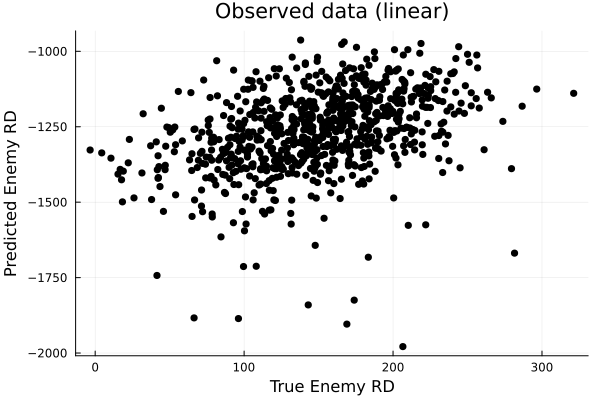

In [248]:

Plots.scatter(enemy_RDs, rds, color="black", label=nothing, title="Observed data (linear)", xlabel="True Enemy RD", ylabel="Predicted Enemy RD")

In [249]:
function do_inference(model, data, rds, amount_of_computation)
    
    # Create a choice map that maps model addresses (:rd, i)
    # to observed values rds[i].
    observations = Gen.choicemap()
    for (i, rd) in enumerate(rds)
        observations[(:rd, i)] = rd
    end
    
    # Call importance_resampling to obtain a likely trace consistent
    # with our observations.
    (trace, _) = Gen.importance_resampling(model, (data,), observations, amount_of_computation);
    return trace
end;

In [250]:
trace = do_inference(line_model, data, enemy_RDs, 100)

Gen.DynamicDSLTrace{DynamicDSLFunction{Any}}(DynamicDSLFunction{Any}(Dict{Symbol, Any}(), Dict{Symbol, Any}(), Type[Any], false, Union{Nothing, Some{Any}}[nothing], var"##line_model#371", Bool[0], false), Trie{Any, Gen.ChoiceOrCallRecord}(Dict{Any, Gen.ChoiceOrCallRecord}((:rd, 21) => Gen.ChoiceOrCallRecord{Float64}(200.43146661672273, -1.1482954784866434e6, NaN, true), (:rd, 15) => Gen.ChoiceOrCallRecord{Float64}(210.2276234165604, -3.257885177753054e6, NaN, true), (:rd, 504) => Gen.ChoiceOrCallRecord{Float64}(263.4759448658048, -4.0936320161513956e6, NaN, true), (:rd, 383) => Gen.ChoiceOrCallRecord{Float64}(179.28616479828742, -1.0777571394709784e6, NaN, true), (:rd, 756) => Gen.ChoiceOrCallRecord{Float64}(151.8343468555506, -1.358331587557817e6, NaN, true), (:rd, 195) => Gen.ChoiceOrCallRecord{Float64}(211.80523927860284, -3.769263686983028e6, NaN, true), (:rd, 648) => Gen.ChoiceOrCallRecord{Float64}(286.68855367260267, -3.2794619747399576e6, NaN, true), (:rd, 266) => Gen.ChoiceOrCa

In [251]:
rds_gen = []
choices = get_choices(trace)
for i in 1:800
    push!(rds_gen, choices[(:rd, i)])
end
print(rds_gen)

Any[173.91825162808686, 206.59171040628277, 66.39775080607397, 147.74036866025403, 143.05926856808625, 281.5719513590588, 168.9895403980307, 221.94125739815902, 41.49822200433361, 108.13636550753144, 179.42578661626513, 99.60334261398214, 96.19580375614134, 183.3979436588286, 210.2276234165604, 116.8656702889588, 92.81875467612268, 72.11373971262377, 145.0787497633764, 187.99289382565001, 200.43146661672273, 143.7467303693868, 112.34733130829204, 89.92448987380797, 77.16444683479165, 171.4234139476556, 121.74955702264499, 174.61528658563728, 113.3204466543494, 162.2816074861184, 168.48132557641085, 169.73145571014413, 53.46800394791177, 75.94923813949424, 134.13967114683584, 103.71129974674054, 109.7102468125081, 206.4905319549317, 37.24655339441418, 155.55844336198845, 156.60156827294017, 130.34326468142632, 176.49558533086451, 128.92495813576147, 178.27766056056174, 119.2999767453632, 91.3356045022228, 42.44818990272394, 108.40259045943478, 133.5349884652556, 79.86555950943315, 74.04

, 172.83923967547892, 151.8343468555506, 187.2641452258219, 143.21516964519986, 141.1414690195539, 213.4366776655223, 172.00265432709563, 170.82804717891048, 168.10898914068136, 102.63682451889969, 138.82614912628733, 187.36651737316498, 173.44635796395232, 106.15628478341736, 81.00405676368045, 156.7252273048646, 202.29120038429653, 230.75785868250165, 183.91553429468271, 138.08546827719317, 252.48338042055735, 66.9750221072407, 186.01531086762807, 138.225749643628, 144.94570274313884, 217.60778689152784, 119.11153497836932, 227.37226172050285, 110.72556624845967, 161.57289292536663, 122.47235326849889, 15.322451557960875, 223.6870242976828, 45.835729008064945, 125.4562507154839, 211.7102192008128, 163.2226890742453, 78.54613077146395, 145.1537055023542, 174.22793104582846, 133.8311757983309, 181.34856606904995, 140.21420028268682, 223.47804658719997, 121.99740355278672, 203.14551273222833]

In [252]:
print(ceva)

Gen.DynamicDSLChoiceMap(Trie{Any, Gen.ChoiceOrCallRecord}(Dict{Any, Gen.ChoiceOrCallRecord}((:rd, 21) => Gen.ChoiceOrCallRecord{Float64}(-1485.972792090185, 1.3398594495864735, NaN, true), (:rd, 15) => Gen.ChoiceOrCallRecord{Float64}(-1576.794332208577, 1.180003318785194, NaN, true), (:rd, 504) => Gen.ChoiceOrCallRecord{Float64}(-1135.7011610880036, 0.9896137788023243, NaN, true), (:rd, 383) => Gen.ChoiceOrCallRecord{Float64}(-1257.0502640465381, 0.9876841031355958, NaN, true), (:rd, 756) => Gen.ChoiceOrCallRecord{Float64}(-1137.23710050498, 0.8937118733767182, NaN, true), (:rd, 195) => Gen.ChoiceOrCallRecord{Float64}(-1070.8939892849119, 0.6237803967614346, NaN, true), (:rd, 648) => Gen.ChoiceOrCallRecord{Float64}(-1181.914281609478, 1.0389262511771264, NaN, true), (:rd, 266) => Gen.ChoiceOrCallRecord{Float64}(-1031.1795637002378, 1.1037400713374113, NaN, true), (:rd, 791) => Gen.ChoiceOrCallRecord{Float64}(-1124.9178583242622, 1.293655688951234, NaN, true), (:rd, 88) => Gen.ChoiceOrC

}(-1230.0944444769193, -2.0645447736292915, NaN, true), (:rd, 749) => Gen.ChoiceOrCallRecord{Float64}(-1210.478521059572, 0.2593527704613301, NaN, true), (:rd, 766) => Gen.ChoiceOrCallRecord{Float64}(-1233.5779727654437, 1.1952028277166158, NaN, true), (:rd, 680) => Gen.ChoiceOrCallRecord{Float64}(-1615.0598805585146, 0.3121610772315715, NaN, true), (:rd, 194) => Gen.ChoiceOrCallRecord{Float64}(-1189.1967098157875, 1.3184339253350497, NaN, true), (:rd, 488) => Gen.ChoiceOrCallRecord{Float64}(-1184.9617538301397, 1.0517185952600498, NaN, true), (:rd, 306) => Gen.ChoiceOrCallRecord{Float64}(-1350.508407937093, 1.3470390868447848, NaN, true), (:rd, 401) => Gen.ChoiceOrCallRecord{Float64}(-1127.354697704613, 1.3749375974242644, NaN, true), (:rd, 645) => Gen.ChoiceOrCallRecord{Float64}(-1127.6268196720982, 0.33136829670099655, NaN, true), (:rd, 377) => Gen.ChoiceOrCallRecord{Float64}(-1284.7655992333735, 1.272024209504636, NaN, true), (:rd, 708) => Gen.ChoiceOrCallRecord{Float64}(-1469.1248

true), (:rd, 655) => Gen.ChoiceOrCallRecord{Float64}(-1377.6999941203646, 1.1211781842918114, NaN, true), (:rd, 599) => Gen.ChoiceOrCallRecord{Float64}(-1152.2289704706482, 1.0783559800993716, NaN, true), (:rd, 303) => Gen.ChoiceOrCallRecord{Float64}(-1198.9383512182862, 1.0258305027782604, NaN, true), (:rd, 499) => Gen.ChoiceOrCallRecord{Float64}(-1110.783294621389, 1.371529208911502, NaN, true), (:rd, 797) => Gen.ChoiceOrCallRecord{Float64}(-1284.7792056280125, 1.2310286810631095, NaN, true), (:rd, 234) => Gen.ChoiceOrCallRecord{Float64}(-1212.9953850559252, 0.831972543062744, NaN, true), (:rd, 232) => Gen.ChoiceOrCallRecord{Float64}(-1179.4456578646893, 1.357008735859817, NaN, true), (:rd, 17) => Gen.ChoiceOrCallRecord{Float64}(-1568.1451974758352, -0.8771165794839, NaN, true), (:rd, 207) => Gen.ChoiceOrCallRecord{Float64}(-1138.7978015715123, 1.0618149234151961, NaN, true), (:rd, 456) => Gen.ChoiceOrCallRecord{Float64}(-1171.7247400679187, 1.2420301462881016, NaN, true), (:rd, 407)

, NaN, true), (:rd, 8) => Gen.ChoiceOrCallRecord{Float64}(-1575.017509347461, 1.3739999418716895, NaN, true), (:rd, 349) => Gen.ChoiceOrCallRecord{Float64}(-1388.1797851266738, 1.192675679284771, NaN, true), (:rd, 612) => Gen.ChoiceOrCallRecord{Float64}(-1209.6364188009063, 1.3696018079579397, NaN, true), (:rd, 696) => Gen.ChoiceOrCallRecord{Float64}(-1378.1568036475037, 0.9449367756259828, NaN, true), (:rd, 242) => Gen.ChoiceOrCallRecord{Float64}(-1147.4492087154997, 1.3333953515531447, NaN, true), (:rd, 604) => Gen.ChoiceOrCallRecord{Float64}(-1227.548106850458, 0.5026663465602828, NaN, true), (:rd, 247) => Gen.ChoiceOrCallRecord{Float64}(-1133.2727252780462, 0.7754983648975351, NaN, true), (:rd, 723) => Gen.ChoiceOrCallRecord{Float64}(-1397.402432005984, 1.3816793863764727, NaN, true), (:rd, 711) => Gen.ChoiceOrCallRecord{Float64}(-1273.7700020700509, 1.3822410243961492, NaN, true), (:rd, 291) => Gen.ChoiceOrCallRecord{Float64}(-1056.9815005635778, 1.3832014217886566, NaN, true), (:

 => Gen.ChoiceOrCallRecord{Float64}(-1324.7519863154766, 0.9216171922711252, NaN, true), (:rd, 765) => Gen.ChoiceOrCallRecord{Float64}(-1204.9614964307232, 0.38213136077750187, NaN, true), (:rd, 231) => Gen.ChoiceOrCallRecord{Float64}(-1089.0355245661253, -0.295250087221715, NaN, true), (:rd, 154) => Gen.ChoiceOrCallRecord{Float64}(-1149.1011467338526, 1.0486993877520172, NaN, true), (:rd, 741) => Gen.ChoiceOrCallRecord{Float64}(-1331.4248504810587, 1.083644764118749, NaN, true), (:rd, 157) => Gen.ChoiceOrCallRecord{Float64}(-1342.6792087179876, -1.4631653181719289, NaN, true), (:rd, 446) => Gen.ChoiceOrCallRecord{Float64}(-1382.090514947953, 0.23219823076234958, NaN, true), (:rd, 332) => Gen.ChoiceOrCallRecord{Float64}(-1438.383273362823, -0.9880676762437659, NaN, true), (:rd, 186) => Gen.ChoiceOrCallRecord{Float64}(-1299.0027281304353, 0.8844998294185484, NaN, true), (:rd, 163) => Gen.ChoiceOrCallRecord{Float64}(-1079.1522903837435, 1.0026377559473658, NaN, true), (:rd, 110) => Gen.C

:rd, 785) => Gen.ChoiceOrCallRecord{Float64}(-1251.7825203812065, 0.6365892815748406, NaN, true), (:rd, 703) => Gen.ChoiceOrCallRecord{Float64}(-1401.7094118404211, 0.3975112936644114, NaN, true), (:rd, 255) => Gen.ChoiceOrCallRecord{Float64}(-1205.1453086768643, 1.3829303700184012, NaN, true), (:rd, 272) => Gen.ChoiceOrCallRecord{Float64}(-1119.5253354121087, -1.9367270476610492, NaN, true), (:rd, 506) => Gen.ChoiceOrCallRecord{Float64}(-1006.3366992626409, 1.0447181782678872, NaN, true), :w131 => Gen.ChoiceOrCallRecord{Float64}(-1.1299946206897284, -1.5573824545985344, NaN, true), (:rd, 459) => Gen.ChoiceOrCallRecord{Float64}(-1253.9103206153204, 1.2577272743355339, NaN, true), (:rd, 176) => Gen.ChoiceOrCallRecord{Float64}(-1195.5450159634702, 1.294384875120701, NaN, true), (:rd, 11) => Gen.ChoiceOrCallRecord{Float64}(-1429.6109701673772, 1.366777662963916, NaN, true), (:rd, 341) => Gen.ChoiceOrCallRecord{Float64}(-1262.8705049160105, 1.3836165556447704, NaN, true), (:rd, 165) => Gen

:rd, 351) => Gen.ChoiceOrCallRecord{Float64}(-1443.1246553879737, 0.955764740149871, NaN, true), (:rd, 607) => Gen.ChoiceOrCallRecord{Float64}(-1264.5022595791454, 1.1341338001949512, NaN, true), (:rd, 777) => Gen.ChoiceOrCallRecord{Float64}(-1123.3699070957177, 1.3789474055328266, NaN, true), (:rd, 484) => Gen.ChoiceOrCallRecord{Float64}(-1359.6977595820508, 0.8686912277744763, NaN, true), (:rd, 302) => Gen.ChoiceOrCallRecord{Float64}(-1285.4363212106482, 0.8346875129364526, NaN, true), (:rd, 264) => Gen.ChoiceOrCallRecord{Float64}(-1300.1145638807068, 1.3726971910785908, NaN, true), (:rd, 623) => Gen.ChoiceOrCallRecord{Float64}(-1293.0955402806076, 1.3291690486565844, NaN, true), (:rd, 598) => Gen.ChoiceOrCallRecord{Float64}(-1317.16373286755, 0.5478430220622417, NaN, true), (:rd, 356) => Gen.ChoiceOrCallRecord{Float64}(-1206.364589372259, 0.9129807657251934, NaN, true), (:rd, 411) => Gen.ChoiceOrCallRecord{Float64}(-1255.8996050037294, 1.0361391728561875, NaN, true), (:rd, 625) => G

694) => Gen.ChoiceOrCallRecord{Float64}(-1221.041828432667, 1.3703705444113048, NaN, true), (:rd, 130) => Gen.ChoiceOrCallRecord{Float64}(-1363.0826486645894, 1.021558671066176, NaN, true), (:rd, 770) => Gen.ChoiceOrCallRecord{Float64}(-1275.3404414114423, 1.1915381169644121, NaN, true), (:rd, 361) => Gen.ChoiceOrCallRecord{Float64}(-1320.9763296783403, 0.9228568500437999, NaN, true), (:rd, 514) => Gen.ChoiceOrCallRecord{Float64}(-1206.114803233955, 0.3528333004358317, NaN, true), (:rd, 252) => Gen.ChoiceOrCallRecord{Float64}(-1339.4543963782808, 1.1362427217607463, NaN, true), (:rd, 518) => Gen.ChoiceOrCallRecord{Float64}(-1288.0686800748551, 1.3836412255965622, NaN, true), (:rd, 692) => Gen.ChoiceOrCallRecord{Float64}(-1397.8617576864074, 0.8241121966215266, NaN, true), (:rd, 408) => Gen.ChoiceOrCallRecord{Float64}(-1286.3992455198402, -0.9572716266624095, NaN, true), (:rd, 323) => Gen.ChoiceOrCallRecord{Float64}(-1381.6517832519942, 1.2801486150529768, NaN, true), (:rd, 203) => Gen.

-1428.5651040812972, 0.4767877618170413, NaN, true), (:rd, 83) => Gen.ChoiceOrCallRecord{Float64}(-1098.9763912004107, 1.2590692059926145, NaN, true), (:rd, 541) => Gen.ChoiceOrCallRecord{Float64}(-1108.391316936928, 1.1941107395568957, NaN, true), (:rd, 251) => Gen.ChoiceOrCallRecord{Float64}(-1267.138946149831, 1.382254815583501, NaN, true), (:rd, 524) => Gen.ChoiceOrCallRecord{Float64}(-1229.703946526372, 0.420900383074271, NaN, true), (:rd, 767) => Gen.ChoiceOrCallRecord{Float64}(-1057.943620180743, 1.333052582402416, NaN, true), (:rd, 363) => Gen.ChoiceOrCallRecord{Float64}(-1549.092339988096, 1.1594023342602333, NaN, true), (:rd, 431) => Gen.ChoiceOrCallRecord{Float64}(-1167.0631800202864, 1.3307987396618002, NaN, true), (:rd, 443) => Gen.ChoiceOrCallRecord{Float64}(-1291.9844718660333, 0.7025895154105737, NaN, true), (:rd, 790) => Gen.ChoiceOrCallRecord{Float64}(-1308.9600861560273, 0.4327811907156436, NaN, true), (:rd, 453) => Gen.ChoiceOrCallRecord{Float64}(-1185.3849382101398

In [253]:
print(rds)

Any[-1824.6778675242342, -1978.648291161723, -1883.53328321831, -1643.1021845742284, -1840.5228457066546, -1668.927612284644, -1904.143824381655, -1575.017509347461, -1742.8869372667439, -1712.3837111671928, -1429.6109701673772, -1713.283947887208, -1885.7397594342297, -1682.463787790853, -1576.794332208577, -1526.3586295315743, -1568.1451974758352, -1531.5971771017962, -1479.4371975093472, -1397.6930290493053, -1485.972792090185, -1312.2980120891232, -1530.4011583042438, -1384.5089530676212, -1153.1190609425346, -1343.1322244297608, -1389.035350739951, -1184.0208193434703, -1116.1221403513507, -1156.521585296271, -1216.640290765682, -1181.0492109942854, -1250.9336346980094, -1245.9674846062617, -1366.713627116281, -1285.1305172060852, -1197.218024203836, -1173.9917773293516, -1313.0844288303238, -1315.7026248811046, -1091.908693332716, -1103.3444064825574, -1143.6452190204138, -1340.5506768963658, -1266.07509414244, -1385.8816683380478, -1340.6882887773504, -1418.2645311640474, -1167.

, -1301.1242749540913, -1306.9305642559877, -1293.899362670448, -1185.7097878812654, -1135.7011610880036, -1268.632916653572, -1006.3366992626409, -1212.987693388367, -1320.2627471584979, -1132.076419965061, -1141.2990644019708, -1178.2964763837513, -1150.3771830128242, -1162.7175012893908, -1206.114803233955, -1160.6853274770508, -1067.6357556675175, -1397.190935537479, -1288.0686800748551, -1259.519999522778, -1259.833307779854, -1386.1082405607553, -1246.51439580676, -1089.3778523520318, -1229.703946526372, -1355.6453624958372, -1335.7395635443986, -1226.1331752658457, -1267.3990997328513, -1290.0635978545015, -1494.3557839300083, -1163.067163100637, -1242.6248849939425, -1149.3424016838349, -1423.8520277648956, -1324.015366910476, -1089.879803356367, -1209.8729566269374, -1371.5936244098605, -1318.1118226603812, -1167.9531459307884, -1108.391316936928, -1294.2614428511285, -1292.5145655911858, -1310.91847094722, -1287.0066865569372, -1139.8632843727944, -1257.296357426688, -1255.64

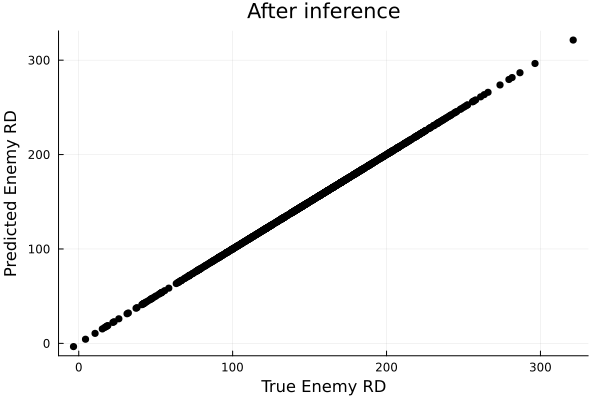

In [254]:
Plots.scatter(enemy_RDs, rds_gen, color="black", label=nothing, title="After inference", xlabel="True Enemy RD", ylabel="Predicted Enemy RD")

In [227]:
function predict_new_data(model, trace, new_data, param_addrs)
    constraints = Gen.choicemap()
    for addr in param_addrs
        constraints[addr] = trace[addr]
    end
    
    (new_trace, _) = Gen.generate(model, (new_data,), constraints)
    
    rds = [new_trace[(:rd, i)] for i=1:length(new_data)]
    return rds
end;

In [255]:
#depending if using simple or complex model
array = [:w111, :w121, :w131, :w141, :w151, :w161, :w211, :w221, :w231, :w241, :w251, :w261, :w311, :w321, :w331, :w341, :w351, :w361, :w112, :w122, :w132, :bias11, :bias21, :bias31, :bias12]        
#array = [:w1, :w2, :w3, :w4, :w5, :w6, :bias]        


25-element Vector{Symbol}:
 :w111
 :w121
 :w131
 :w141
 :w151
 :w161
 :w211
 :w221
 :w231
 :w241
 :w251
 :w261
 :w311
 :w321
 :w331
 :w341
 :w351
 :w361
 :w112
 :w122
 :w132
 :bias11
 :bias21
 :bias31
 :bias12

In [229]:
function infer_and_predict(model, data, rds, new_data, param_addrs, num_traces, amount_of_computation)
    pred_rds = []
    for i=1:num_traces
        trace = do_inference(model, data, rds, amount_of_computation)
        push!(pred_rds, predict_new_data(model, trace, new_data, param_addrs))
    end
    pred_rds
end;

In [256]:
pred_rds = infer_and_predict(line_model, data, enemy_RDs, validation_data, array, 1, 100000)

1-element Vector{Any}:
 [154.78843552977983, 126.9917536676072, 155.36733893795437, 160.05848470960595, 166.11365305719204, 166.18309791675742, 150.10860315091264, 171.047588862732, 178.54030004337025, 122.60625621748875  …  168.14196930708164, 134.67223982951043, 71.4465027728536, 147.2057238120685, 188.7899919169, 194.18767482655275, 133.5827010505286, 190.67267024749336, 173.13628857208684, 163.84900136429945]

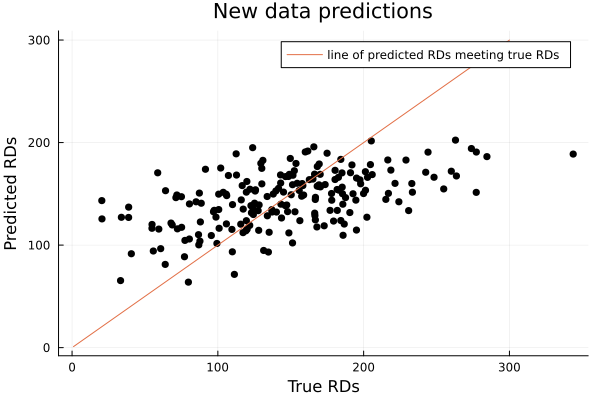

In [257]:
plot(validation_answers, pred_rds, seriestype=:scatter, color="black", label=nothing, title="New data predictions", xlabel="True RDs", ylabel="Predicted RDs")
plot!([1:300], [1:300], label="line of predicted RDs meeting true RDs")

In [258]:
print(validation_answers)

[254.9260350526688, 38.78848267357107, 141.63172827520972, 233.04728518982944, 182.7005335792887, 248.28330812375884, 185.48658327109945, 242.57401559673212, 204.65244086424445, 88.01553070647664, 233.449831492627, 143.66553314810938, 166.56629919742585, 130.17105883073174, 263.63479459729444, 166.434376553119, 140.16383304665044, 124.12512845393059, 142.99386897156336, 55.73066742247758, 100.57609973927214, 79.78943435141368, 95.52080595023115, 59.504095642560756, 186.6871941386851, 135.18284081857033, 199.9430954660321, 156.2548747670979, 139.81992530986537, 124.3560668747377, 91.49719169223094, 130.13220536264961, 169.51967766368836, 205.86751539774, 86.73508556651501, 121.85882769992219, 150.31454361664083, 195.13516697160657, 262.99580140570373, 166.34330321292643, 112.55329536811188, 107.24394447257006, 60.79649035474337, 183.10169779581756, 151.22397400098134, 165.84300141775074, 147.8399407535621, 134.666319930912, 98.70942388465924, 172.9337317566307, 125.59042003898682, 194.6

In [259]:
print(pred_rds[1])

[154.78843552977983, 126.9917536676072, 155.36733893795437, 160.05848470960595, 166.11365305719204, 166.18309791675742, 150.10860315091264, 171.047588862732, 178.54030004337025, 122.60625621748875, 151.59111941775612, 126.44639192547001, 128.80361228640513, 159.72668314857805, 167.4365620225623, 131.17896013257788, 132.21982098813737, 135.8607190383333, 168.46586669059735, 94.23693288763485, 149.69694424234896, 63.86285958883259, 109.32536583148796, 115.61990049618758, 120.52505745662795, 112.52359508226927, 150.26639457900694, 123.8434976206025, 152.848112325257, 129.82838626269503, 173.9760051995022, 174.85359036986367, 179.12742059792166, 168.77817759105147, 110.18112587734234, 119.2241188227026, 149.10319367219793, 165.39403473635838, 202.3893608646044, 169.20566729754495, 189.02047903265208, 167.90137962153486, 96.52876396782916, 153.57083186380973, 102.1171584360458, 195.83756298064569, 132.6510887294341, 93.21932650560029, 127.32103769236859, 118.8337320482517, 152.7257950208189

In [260]:
difference = validation_answers - pred_rds[1]

200-element Vector{Float64}:
  100.13759952288896
  -88.20327099403613
  -13.735610662744648
   72.98880048022349
   16.586880522096664
   82.10021020700142
   35.377980120186805
   71.52642673400013
   26.112140820874203
  -34.59072551101211
   81.85871207487088
   17.219141222639365
   37.76268691102072
    ⋮
  -11.794719273171523
 -105.03379065735953
  -16.62791272289337
  -34.07563507089381
   39.89255557936366
  -72.19454582930786
  154.94835506869381
   79.72676664768616
   -5.942913390152228
   53.48814437258628
   45.541855265851694
   -1.1045632412716486

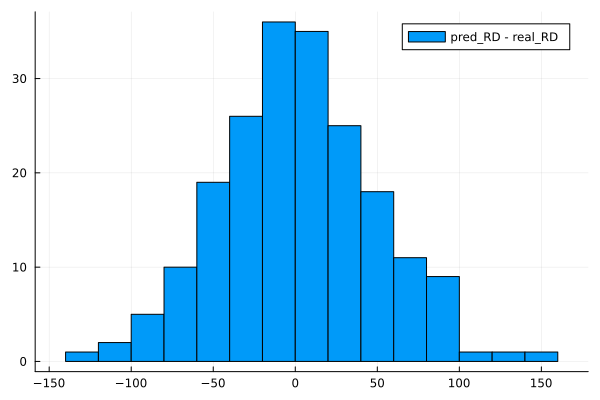

In [261]:
Plots.histogram(difference, bins=20, label="pred_RD - real_RD")

In [262]:
mean = 0
abs_difference = [abs(value) for value in difference]

200-element Vector{Float64}:
 100.13759952288896
  88.20327099403613
  13.735610662744648
  72.98880048022349
  16.586880522096664
  82.10021020700142
  35.377980120186805
  71.52642673400013
  26.112140820874203
  34.59072551101211
  81.85871207487088
  17.219141222639365
  37.76268691102072
   ⋮
  11.794719273171523
 105.03379065735953
  16.62791272289337
  34.07563507089381
  39.89255557936366
  72.19454582930786
 154.94835506869381
  79.72676664768616
   5.942913390152228
  53.48814437258628
  45.541855265851694
   1.1045632412716486

In [263]:
for value in abs_difference
    mean += value
end
mean /= length(abs_difference)


37.31928651944872

In [264]:
print(mean)

37.31928651944872